# Load libraries

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
import math
import numpy as np
from matplotlib.patches import Polygon
from matplotlib.colors import to_rgba
from matplotlib.patches import Patch

# Read, process data

In [40]:
#Read in data
df = pd.read_csv("D:\\OneDrive\\University of Washington Seattle\\Year 4 Quarter 3 (Spring)\\INFO 474\\Assginments\\A1\\antibiotics_data_original.csv", sep=',')

#Drop unused column
df = df.drop(["Gram Staining "],axis=1)




#Replace Bacteria Name with Abbreviated family name
#So "Aerobacter aerogenes" => "A. aerogenes"

#Loop through all the names
for i in range(len(df)):
    
    #Split the string
    bacteria_name = df['Bacteria '][i]
    bacteria_name = bacteria_name.split()
    
    #Keep only the first, last word
    bacteria_name = [bacteria_name[0], bacteria_name[-1]]
        
    #Keep only first charachter of first word
    bacteria_name[0] = bacteria_name[0][0] + "."
    
    #Replace the entry in the dataframe
    df['Bacteria '][i] = ' '.join(bacteria_name)
    

    

#Transpose data; it's easier to format the data this way for plotting
df = df.T

#Set first row as the column name, and drop the row after
df.columns = df.iloc[0]
df = df.reindex(df.index.drop('Bacteria '))

#Add Numbers for indexes
df = df.reset_index()

df

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Bacteria,index,A. aerogenes,B. abortus,B. anthracis,D. pneumoniae,E. coli,K. pneumoniae,M. tuberculosis,P. vulgaris,P. aeruginosa,S. typhosa,S. schottmuelleri,S. albus,S. aureus,S. fecalis,S. hemolyticus,S. viridans
0,Penicilin,870,1,0.001,0.005,100,850,800,3,850,1,10,0.007,0.03,1,0.001,0.005
1,Streptomycin,1,2,0.01,11,0.4,1.2,5,0.1,2,0.4,0.8,0.1,0.03,1,14,10
2,Neomycin,1.6,0.02,0.007,10,0.1,1,2,0.1,0.4,0.008,0.09,0.001,0.001,0.1,10,40


# Create Plot

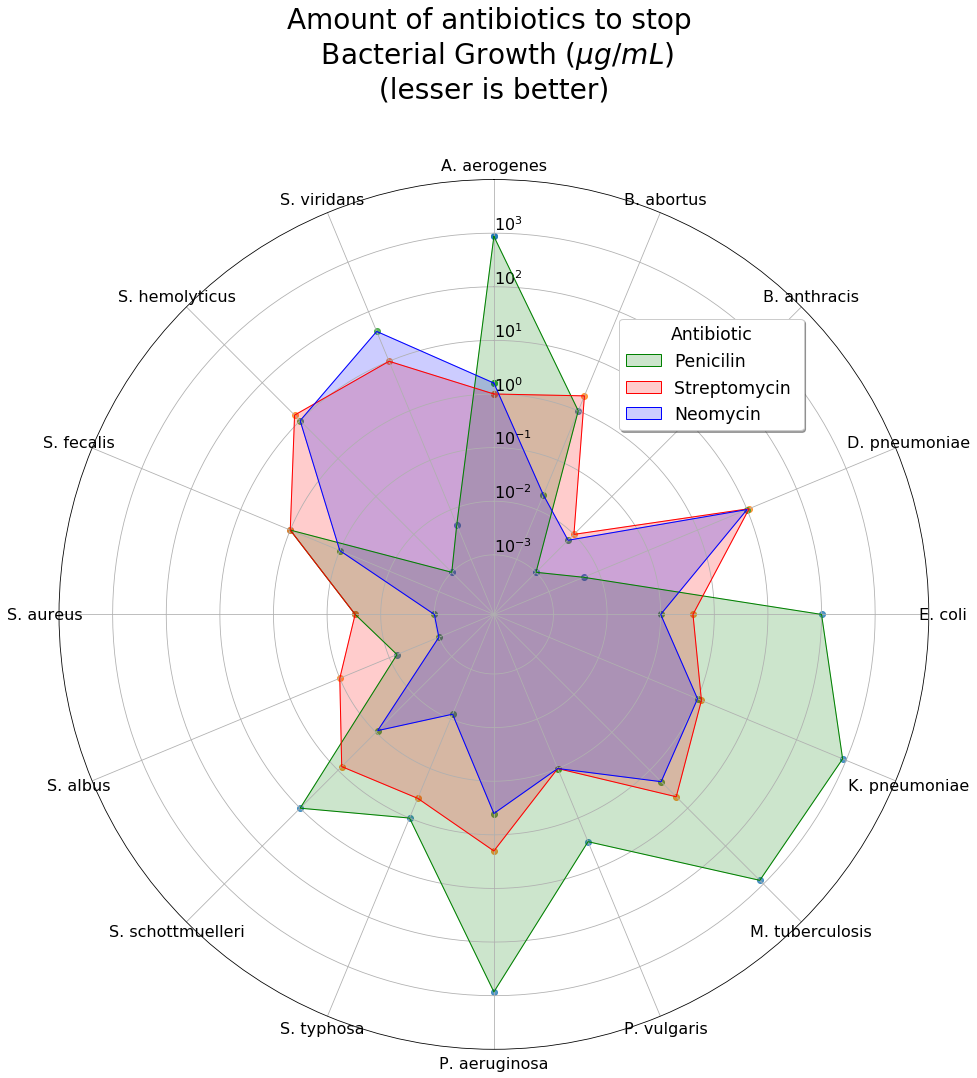

In [123]:
#Plot markers, axis, y-labels

#Set the plot's size, type (spider plot), and scale
plt.figure(figsize=(16, 16))
ax = plt.subplot(111, polar=True)
plt.yscale("symlog", linthreshy=.001)

# Setting the first axis on top (locks it in place)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Set y-label position, y-limit range
ax.set_rlabel_position(0)
plt.ylim(0,10000)

#Add y ticks (powers of 10)
y_ticks_true =  [label for label in np.logspace(-3, 3, endpoint=True, num=7, base=10).tolist() ]
plt.yticks(y_ticks_true, color="black", size=16)

#Add title
plt.title("Amount of antibiotics to stop \n Bacterial Growth ($\mu g/mL$) \n (lesser is better) \n", fontsize=28)





#Plot categories

#Names of variables/bacteria (first one is index; 2nd column onwards are Bacteria)
categories=list(df)[1:]

# Draw one angle per variable + add bacteria names
plt.xticks(angles[:-1], categories, size=16)

# Number of variables or Bacteria
N = len(categories) 

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]





#Plot data

#Plot the various antibiotic data; looping over the colors I want them to be
colors = ['green', 'red', 'blue']

#Constructing a custom legend
legend_plot = []

#For i in range 0-2
for i in range(len(colors)):
    
    #Read the ith row
    values=df.loc[i]
    
    #Skip over the first value corresponding to the index
    values=values[1:].values.flatten().tolist()
    
    #Add the first value to the end (want to loop around for the circle)
    values += values[:1]
    
    #Add the fill, line, point bulb
    ax.fill(angles, values, 'b', alpha=0.2, color=colors[i])
    ax.plot(angles, values, color=colors[i], linewidth=1, linestyle='solid')
    ax.scatter(angles, values, alpha=0.75)

    #Extract the antibiotic data
    antibiotic_name = df['index'][i]

    #Add information to the custom legend
    legend_plot.append(
        
        #Construct a "patch"
        #https://matplotlib.org/gallery/text_labels_and_annotations/custom_legends.html
        Patch(facecolor=to_rgba(colors[i], alpha=0.2), edgecolor=colors[i], label=antibiotic_name)
        
    )





#Plot legend
    
# Add legend
plt.legend(handles=legend_plot, loc="upper center", shadow=True,\
           bbox_to_anchor=(0.75, 0.85), fontsize="xx-large", markerscale=5,\
           title="Antibiotic", title_fontsize="xx-large")

    


plt.show()